In [1]:
# Loading R packages
library(reshape)
library(ggplot2)
library(phyloseq)
library(plyr)
library(dplyr)
library(plotly)
library(wesanderson)
library(vegan)
library(corrplot)


Attaching package: ‘plyr’

The following objects are masked from ‘package:reshape’:

    rename, round_any


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:reshape’:

    rename

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘plotly’

The following objects are masked from ‘package:plyr’:

    arrange, mutate, rename, summarise

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:reshape’:

    rename

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout

Loading required package: permute
Loading required package: lattice
This is vegan 2.4-4


In [2]:
# Setting various parameters as combined values
ps = readRDS("../../../data/Seq_data/16S/CHTC/Dada2_Results_Full/ps.merged")

In [28]:
# Pulling out samples from this project only
ps.wb = ps
ps.wb.org = prune_samples(sample_data(ps.wb)$Org_or_Min %in% c("O"), ps.wb)
ps.wb.min = prune_samples(sample_data(ps.wb)$Org_or_Min %in% c("M"), ps.wb)
ps.wb.org.merged = merge_samples(ps.wb.org, "Site_ID")
ps.wb.min.merged = merge_samples(ps.wb.min, "Site_ID")
ps.wb.norm = transform_sample_counts(ps.wb, function(x) x / sum(x) )
ps.wb.org.merged.norm = transform_sample_counts(ps.wb.org.merged, function(x) x / sum(x) )
ps.wb.min.merged.norm = transform_sample_counts(ps.wb.min.merged, function(x) x / sum(x) )

In [29]:
Dist.mb = as.matrix(distance(ps.wb.norm, method="bray", type="samples"))
Dist.org.mb = as.matrix(distance(ps.wb.org.merged.norm, method="bray", type="samples"))
Dist.min.mb = as.matrix(distance(ps.wb.min.merged.norm, method="bray", type="samples"))

In [30]:
write.csv(Dist.mb, file="../../../data/Seq_data/16S/CHTC/Dada2_Results_Full/Dist.mb.csv")

In [31]:
Dist.veg = read.csv("../../../../../../../Users/Thea/Documents/Madison/Box\ Sync/WhitmanLabMaster/WhitmanLab/Projects/WoodBuffalo/WB2015/data/Veg_properties/WBNPNWT_Vegetation_Braydistance_2015.csv")
row.names(Dist.veg)=Dist.veg$X
Dist.veg=Dist.veg[,2:dim(Dist.veg)[2]]
colnames(Dist.veg)=row.names(Dist.veg)

In [32]:
OrgSamples = colnames(as.matrix(Dist.org.mb))[colnames(as.matrix(Dist.org.mb)) %in% colnames(as.matrix(Dist.veg))]
MinSamples = colnames(as.matrix(Dist.min.mb))[colnames(as.matrix(Dist.min.mb)) %in% colnames(as.matrix(Dist.veg))]

In [33]:
Dist.org.veg = Dist.veg[row.names(Dist.veg) %in% OrgSamples,colnames(Dist.veg) %in% OrgSamples]
Dist.min.veg = Dist.veg[row.names(Dist.veg) %in% MinSamples,colnames(Dist.veg) %in% MinSamples]
Dist.org.mb = Dist.org.mb[row.names(Dist.org.mb) %in% OrgSamples,colnames(Dist.org.mb) %in% OrgSamples]
Dist.min.mb = Dist.min.mb[row.names(Dist.min.mb) %in% MinSamples,colnames(Dist.min.mb) %in% MinSamples]

In [34]:
colnames(Dist.org.mb) == colnames(Dist.org.veg)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[46] TRUE TRUE

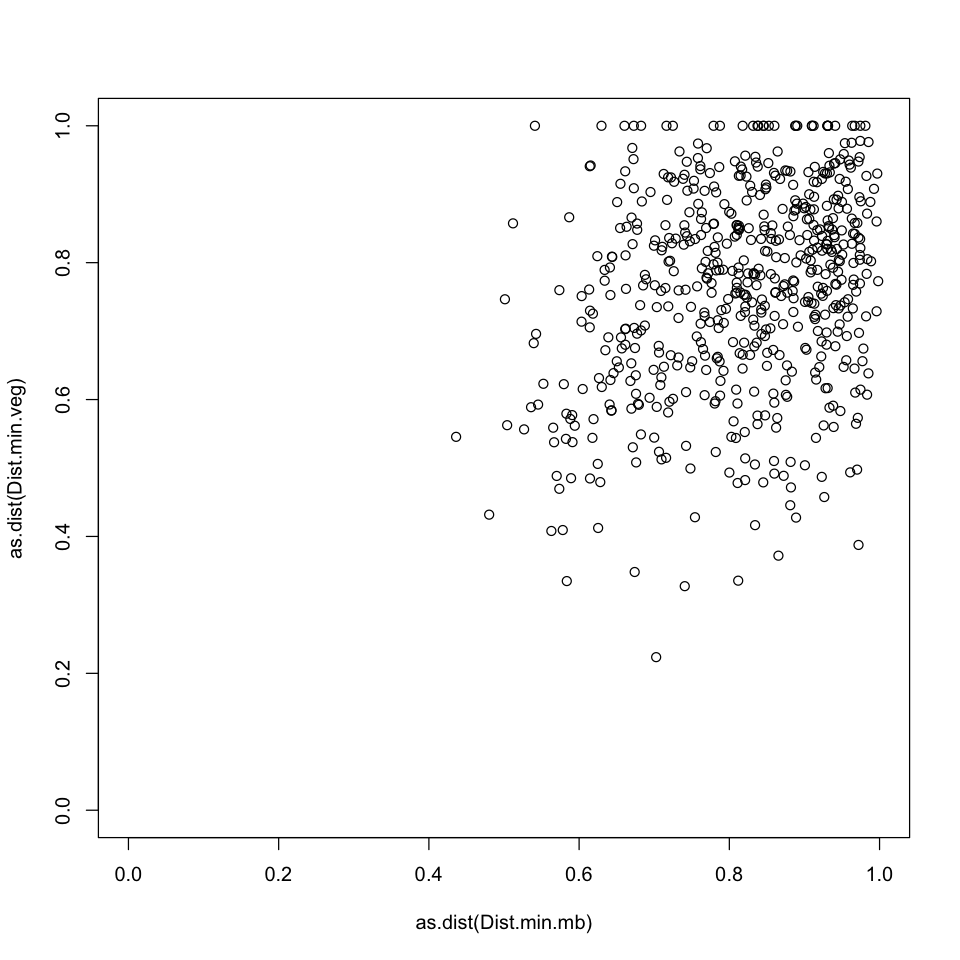

In [35]:
plot(as.dist(Dist.min.mb),as.dist(Dist.min.veg),xlim=c(0,1), ylim=c(0,1))
# colour by distance matrix of burn severity metrics
# colour by distnace matrix of soils

In [36]:
c = cor(Dist.org.mb,Dist.org.veg,method="pearson")

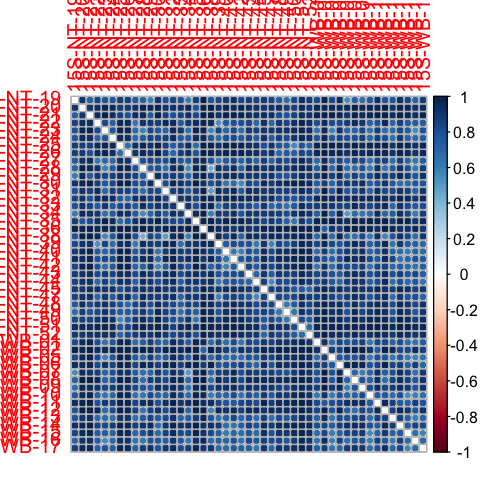

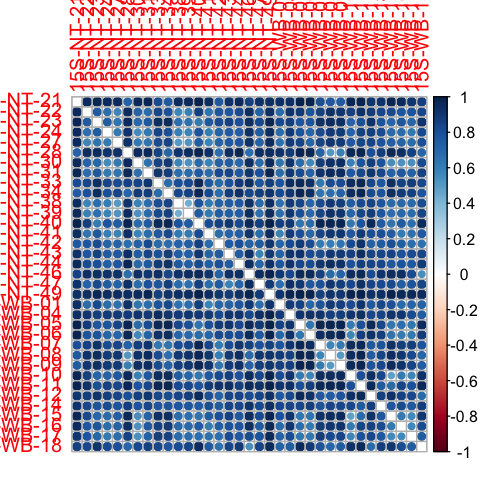

In [37]:
options(repr.plot.width=4, repr.plot.height=4)
corrplot(as.matrix(Dist.org.mb),method="circle")
corrplot(as.matrix(Dist.min.mb),method="circle")

In [38]:
# Making a matrix with one data entry for each site
SamDat = sample_data(ps)[!duplicated(sample_data(ps)$Site_ID),]
rownames(SamDat) = SamDat$Site_ID

In [39]:
df = data.frame(melt(as.matrix(Dist.org.veg)),melt(as.matrix(Dist.org.mb)))
#Generates a dataframe with each contrast and the dissimilarity for the plant comm and the mb comm
df = df[,c(1,2,3,6)]
colnames(df) = c("Site_ID_1","Site_ID_2","Mb_dist","Veg_dist")
#df$X1==df$X1.1 # making sure the contrasts are the same

# Need to add datasets for each site type, and then whether they are the same or not.
# Let's start with wetland vs. upland
for (i in df$Site_ID_1){
    df$Land_Class_1[df$Site_ID_1==i] = SamDat$Land_Class[SamDat$Site_ID==i]
}
for (i in df$Site_ID_2){
    df$Land_Class_2[df$Site_ID_2==i] = SamDat$Land_Class[SamDat$Site_ID==i]
}
df$Land_Class = ifelse(df$Land_Class_1==df$Land_Class_2,df$Land_Class_1,"Different")

# Let's add Veg_Comm
for (i in df$Site_ID_1){
    df$Veg_Comm_1[df$Site_ID_1==i] = SamDat$Veg_Comm[SamDat$Site_ID==i]
}
for (i in df$Site_ID_2){
    df$Veg_Comm_2[df$Site_ID_2==i] = SamDat$Veg_Comm[SamDat$Site_ID==i]
}
df$Veg_Comm = ifelse(df$Veg_Comm_1==df$Veg_Comm_2,df$Veg_Comm_1,"Different")

# Let's add Burned_Unburned
for (i in df$Site_ID_1){
    df$Burned_Unburned_1[df$Site_ID_1==i] = SamDat$Burned_Unburned[SamDat$Site_ID==i]
}
for (i in df$Site_ID_2){
    df$Burned_Unburned_2[df$Site_ID_2==i] = SamDat$Burned_Unburned[SamDat$Site_ID==i]
}
df$Burned_Unburned = ifelse(df$Burned_Unburned_1==df$Burned_Unburned_2,df$Burned_Unburned_1,"Different")

# And let's add Burn_Severity_Index
for (i in df$Site_ID_1){
    df$Burn_Severity_Index_1[df$Site_ID_1==i] = SamDat$Burn_Severity_Index[SamDat$Site_ID==i]
}
for (i in df$Site_ID_2){
    df$Burn_Severity_Index_2[df$Site_ID_2==i] = SamDat$Burn_Severity_Index[SamDat$Site_ID==i]
}
df$Burn_Severity_Index_1 = as.numeric(df$Burn_Severity_Index_1)
df$Burn_Severity_Index_2 = as.numeric(df$Burn_Severity_Index_2)
df$Burn_Severity_Index_Diff = abs(as.numeric(df$Burn_Severity_Index_1) - as.numeric(df$Burn_Severity_Index_2))
df$Burn_Severity_Index_Mean = (as.numeric(df$Burn_Severity_Index_1) + as.numeric(df$Burn_Severity_Index_2))/2
df$Burn_Severity_Index_Ratio = as.numeric(df$Burn_Severity_Index_1) / as.numeric(df$Burn_Severity_Index_2)
df$Burn_Severity_Index_Class = ifelse(df$Burn_Severity_Index_1>mean(df$Burn_Severity_Index_1) &
                                     df$Burn_Severity_Index_2>mean(df$Burn_Severity_Index_1),"high",
                                      ifelse(df$Burn_Severity_Index_1<mean(df$Burn_Severity_Index_1) &
                                     df$Burn_Severity_Index_2<mean(df$Burn_Severity_Index_1),"low","mixed"))
df$Burn_Severity_Index_Class = ordered(df$Burn_Severity_Index_Class, levels = c("high", "mixed", "low"))

# And let's add CBI
for (i in df$Site_ID_1){
    df$CBI_1[df$Site_ID_1==i] = SamDat$CBI[SamDat$Site_ID==i]
}
for (i in df$Site_ID_2){
    df$CBI_2[df$Site_ID_2==i] = SamDat$CBI[SamDat$Site_ID==i]
}
df$CBI_Diff = abs(as.numeric(df$CBI_1) - as.numeric(df$CBI_2))
df$CBI_Mean = (as.numeric(df$CBI_1) + as.numeric(df$CBI_2))/2




# And why not pH?
for (i in df$Site_ID_1){
    df$pH_1[df$Site_ID_1==i] = SamDat$pH[SamDat$Site_ID==i]
}
for (i in df$Site_ID_2){
    df$pH_2[df$Site_ID_2==i] = SamDat$pH[SamDat$Site_ID==i]
}
df$pH_Diff = abs(as.numeric(df$pH_1) - as.numeric(df$pH_2))
df$pH_Mean = (as.numeric(df$pH_1) + as.numeric(df$pH_2))/2


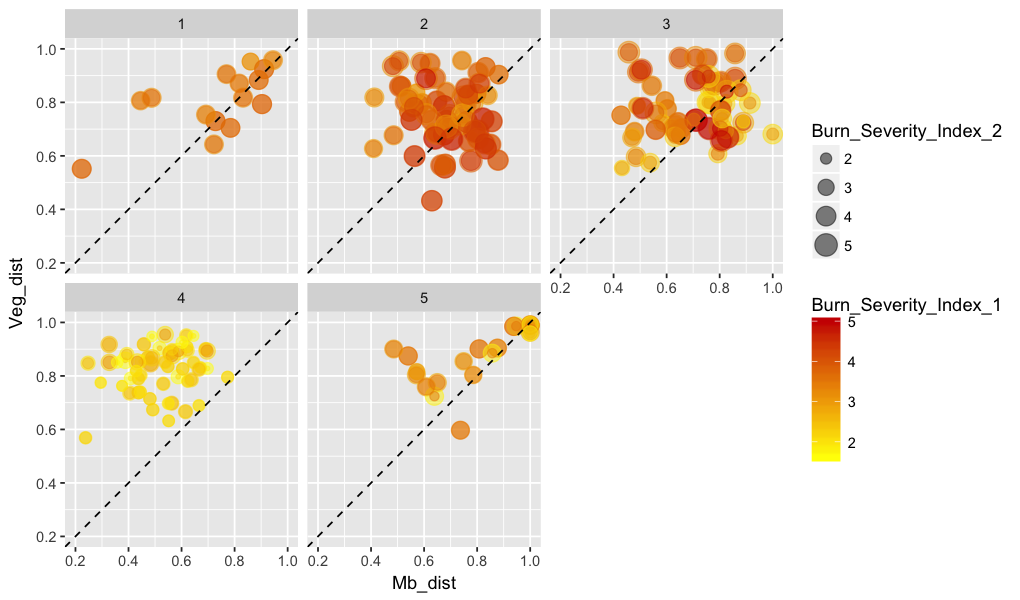

In [40]:
options(repr.plot.width=8.5, repr.plot.height=5)

df.no0 = df %>%
    filter(Site_ID_1 != Site_ID_2)%>%
    filter(Land_Class != "Different")%>%
    filter(Veg_Comm != "Different")

p = ggplot(df.no0 , aes(y=Veg_dist, x=Mb_dist, color=Burn_Severity_Index_1, size=Burn_Severity_Index_2))
p = p + geom_point(alpha=0.5) + scale_color_gradient(low="yellow",high="red3")
p = p + facet_wrap(~Veg_Comm) 
p = p + scale_x_continuous(limits = c(0.2,1))
p = p + scale_y_continuous(limits = c(0.2,1))
p = p + geom_abline(intercept=0, slope=1, linetype="dashed")
p

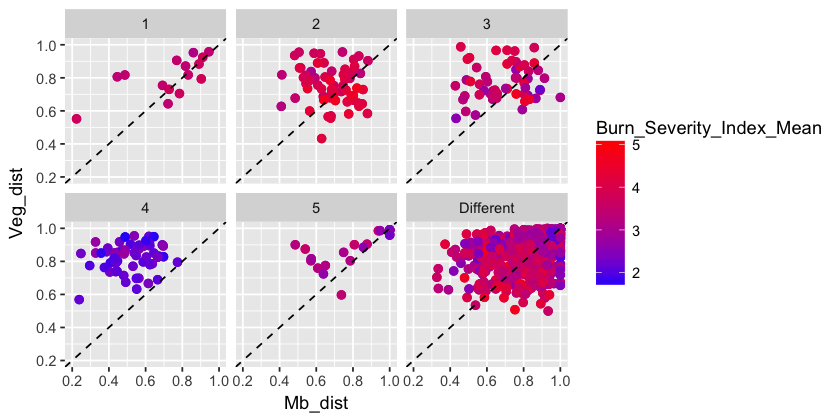

In [41]:
options(repr.plot.width=7, repr.plot.height=3.5)

df.no0 = df %>%
    filter(Site_ID_1 != Site_ID_2)

p = ggplot(df.no0 , aes(y=Veg_dist, x=Mb_dist, color=Burn_Severity_Index_Mean))
p = p + geom_point(alpha=1, size=2) + scale_color_gradient(low="blue",high="red")
p = p + facet_wrap(~Veg_Comm) 
p = p + scale_x_continuous(limits = c(0.2,1))
p = p + scale_y_continuous(limits = c(0.2,1))
p = p + geom_abline(intercept=0, slope=1, linetype="dashed")
p

Warning message:
“Removed 273 rows containing missing values (geom_point).”

Warning message:
“Removed 273 rows containing missing values (geom_point).”

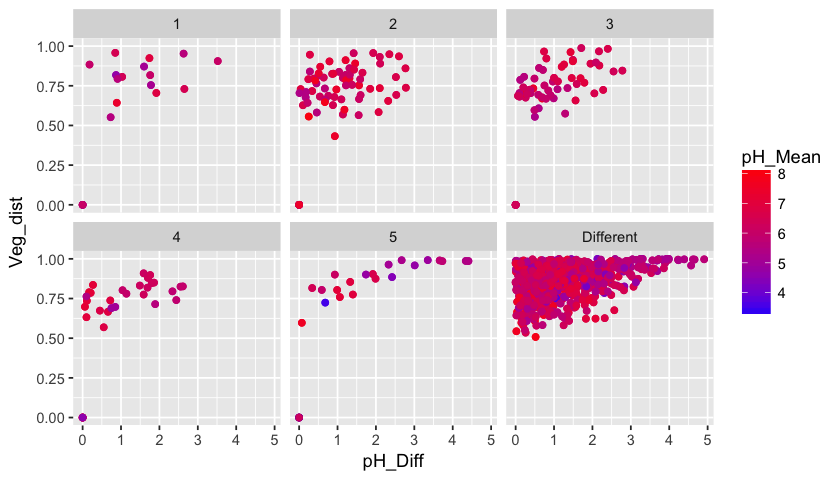

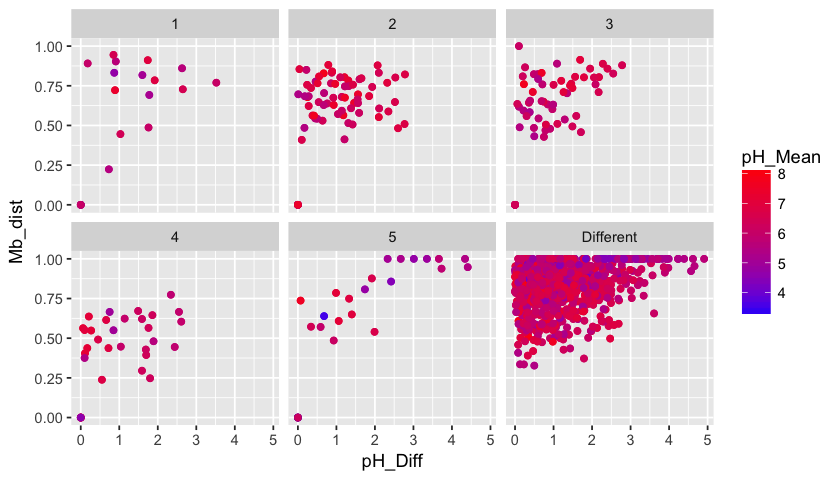

In [42]:
options(repr.plot.width=7, repr.plot.height=4)


p = ggplot(df,aes(color=pH_Mean, x=pH_Diff))
p = p + geom_point(aes(y=Veg_dist))
p = p + facet_wrap(~Veg_Comm) + scale_color_gradient(low="blue",high="red")
p

p = ggplot(df,aes(color=pH_Mean, x=pH_Diff))
p = p + geom_point(aes(y=Mb_dist))
p = p + facet_wrap(~Veg_Comm) + scale_color_gradient(low="blue",high="red")
p

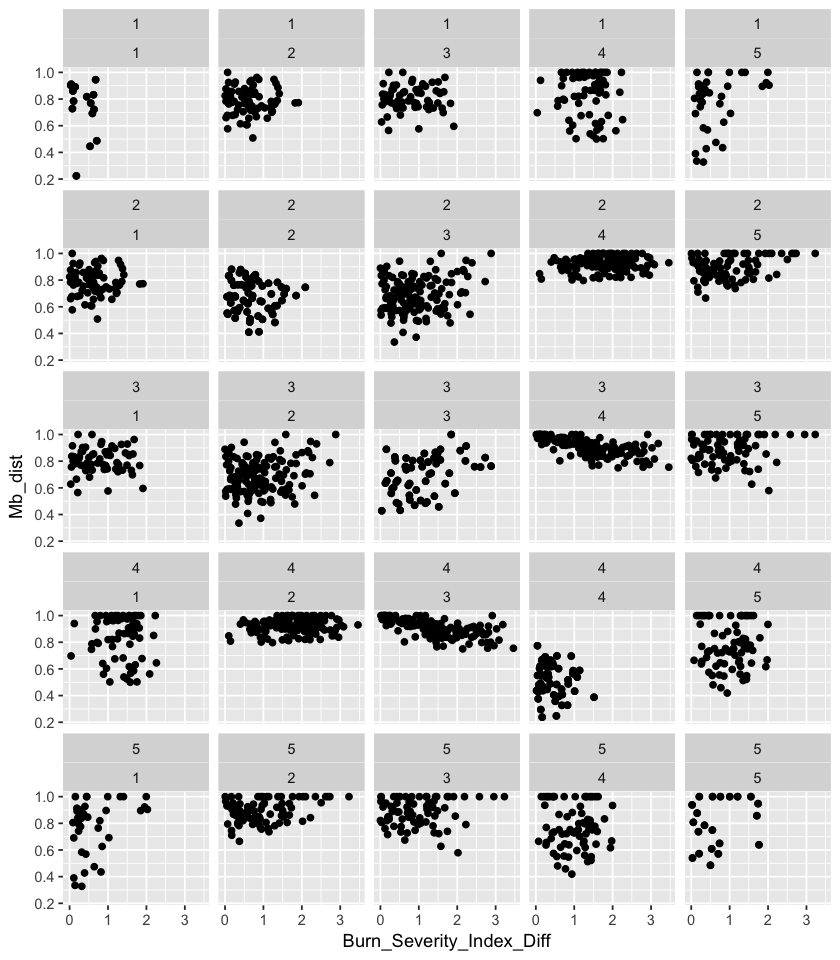

In [43]:
options(repr.plot.width=7, repr.plot.height=8)

df.no0 = df %>%
    filter(Site_ID_1 != Site_ID_2)

p = ggplot(df.no0,aes(y=Mb_dist, x=Burn_Severity_Index_Diff))
p = p + geom_point()
p = p + facet_wrap(~Veg_Comm_1~Veg_Comm_2) + scale_color_gradient(low="blue",high="red")
p

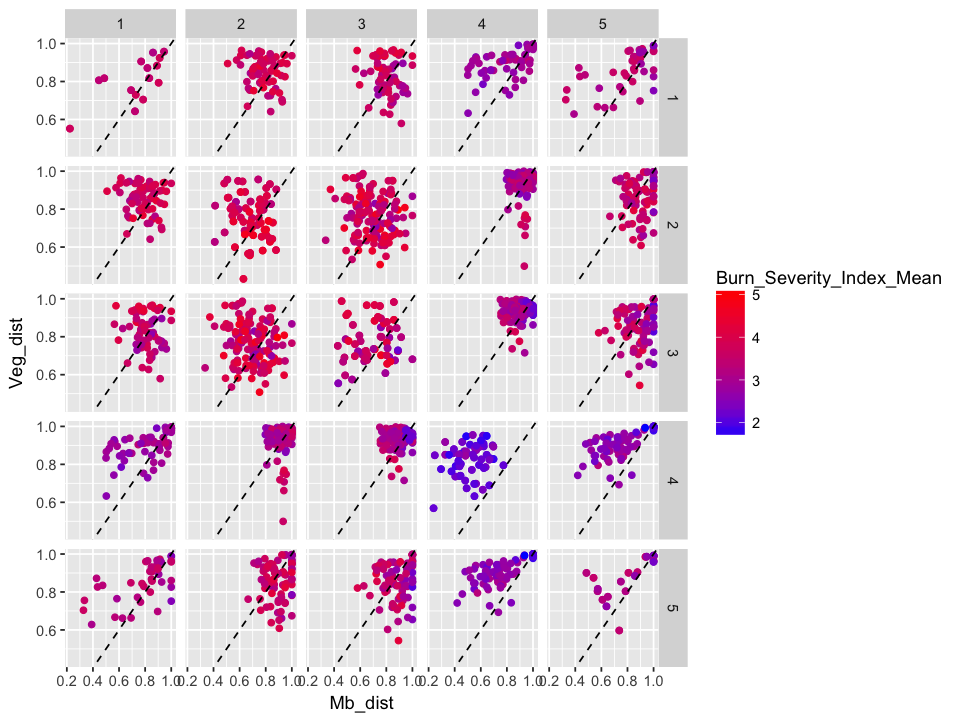

In [44]:
options(repr.plot.width=8, repr.plot.height=6)

df.no0 = df %>%
    filter(Site_ID_1 != Site_ID_2)
p = ggplot(df.no0, aes(x = Mb_dist, y=Veg_dist, color=Burn_Severity_Index_Mean))
#p = ggplot(df.no0, aes(x = Mb_dist, y=Veg_dist, color=Burn_Severity_Index_Class))
p = p + geom_point() + scale_color_gradient(low="blue",high="red")
#p = p + scale_color_manual(values=c("red","yellow","orange"))
#p = p + facet_grid(~Site_ID_1*Veg_Comm_1~Veg_Comm_2) 
#p = p + facet_grid(~Land_Class_1~Land_Class_2)
p = p + facet_grid(~Veg_Comm_1~Veg_Comm_2)
#p = p + scale_x_continuous(limits = c(1,3.5))
p = p + geom_abline(intercept=0, slope=1, linetype="dashed")
p

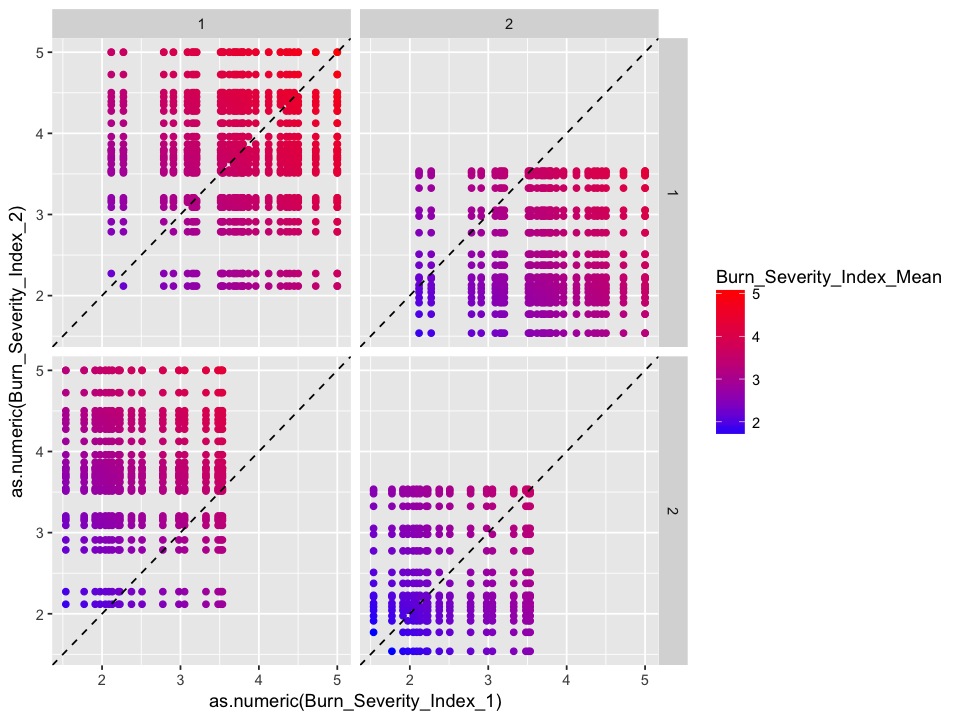

In [45]:
options(repr.plot.width=8, repr.plot.height=6)

df.no0 = df %>%
    filter(Site_ID_1 != Site_ID_2)

p = ggplot(df.no0, aes(x = as.numeric(Burn_Severity_Index_1), y=as.numeric(Burn_Severity_Index_2), color=Burn_Severity_Index_Mean))
p = p + geom_point() + scale_color_gradient(low="blue",high="red")
#p = p + facet_grid(~Site_ID_1*Veg_Comm_1~Veg_Comm_2) 
p = p + facet_grid(~Land_Class_1~Land_Class_2) 
#p = p + scale_x_continuous(limits = c(1,3.5))
p = p + geom_abline(intercept=0, slope=1, linetype="dashed")
p



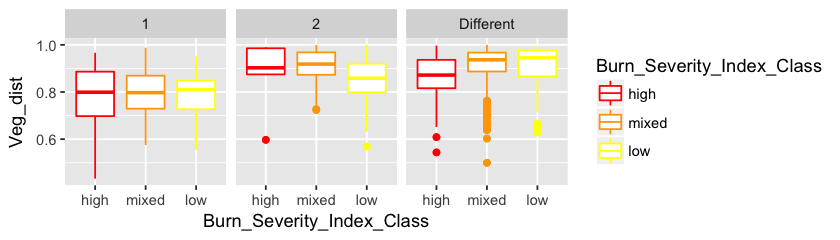

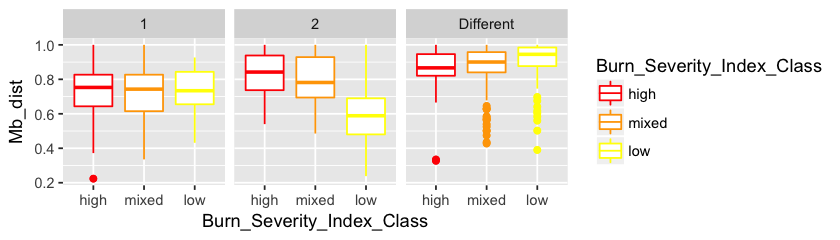

In [46]:
options(repr.plot.width=7, repr.plot.height=2)

df.no0 = df %>%
    filter(Site_ID_1 != Site_ID_2)

p = ggplot(df.no0, aes(x = Burn_Severity_Index_Class, y=Veg_dist, color=Burn_Severity_Index_Class))
p = p + geom_boxplot() #+ scale_color_gradient(low="blue",high="red")
p = p + scale_color_manual(values=c("red","orange","yellow"))
#p = p + facet_grid(~Site_ID_1*Veg_Comm_1~Veg_Comm_2) 
#p = p + facet_grid(~Land_Class_1~Land_Class_2)
#p = p + facet_wrap(~Veg_Comm)
p = p + facet_wrap(~Land_Class)
#p = p + facet_grid(~Veg_Comm_1~Veg_Comm_2)
p

p = ggplot(df.no0, aes(x = Burn_Severity_Index_Class, y=Mb_dist, color=Burn_Severity_Index_Class))
p = p + geom_boxplot() #+ scale_color_gradient(low="blue",high="red")
p = p + scale_color_manual(values=c("red","orange","yellow"))
#p = p + facet_grid(~Site_ID_1*Veg_Comm_1~Veg_Comm_2) 
#p = p + facet_grid(~Land_Class_1~Land_Class_2)
#p = p + facet_wrap(~Veg_Comm)
p = p + facet_wrap(~Land_Class)
#p = p + facet_grid(~Veg_Comm_1~Veg_Comm_2)
p

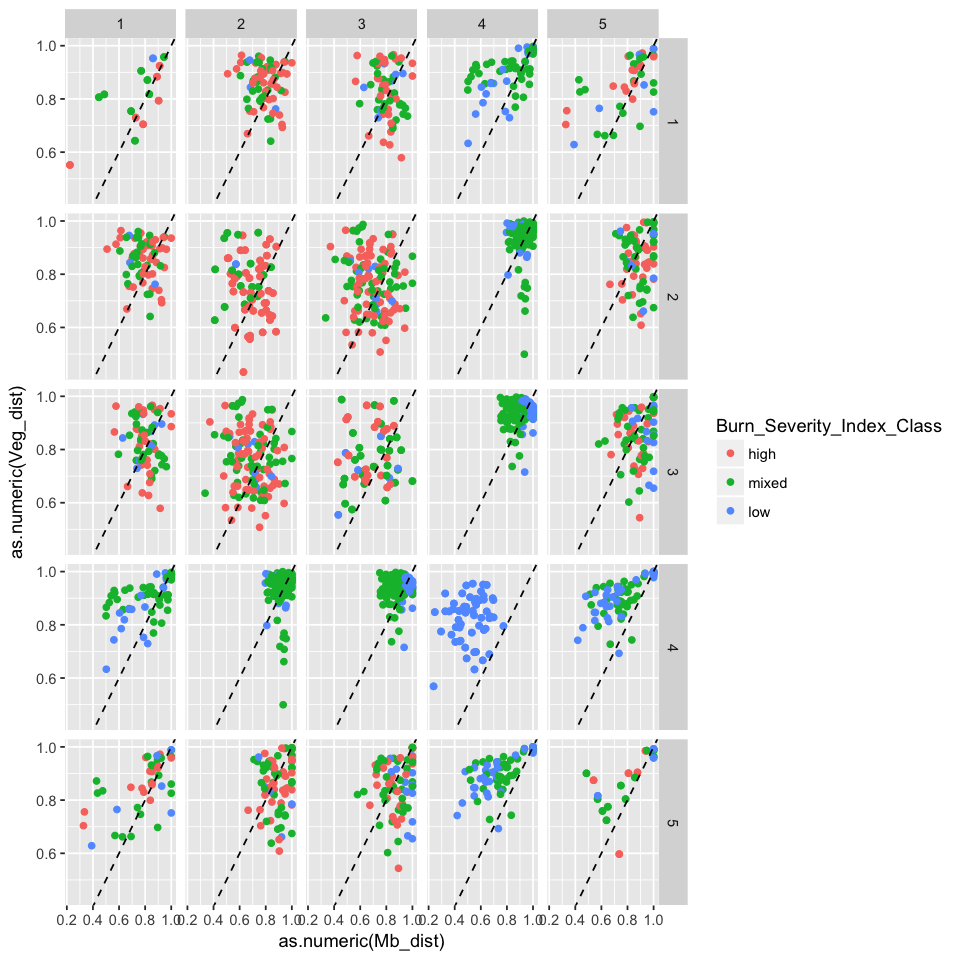

In [47]:
options(repr.plot.width=8, repr.plot.height=8)

df.no0 = df %>%
    filter(Site_ID_1 != Site_ID_2)

p = ggplot(df.no0, aes(y = as.numeric(Veg_dist), x=as.numeric(Mb_dist), color=Burn_Severity_Index_Class))
p = p + geom_point() #+ scale_color_gradient(low="blue",high="red")
p = p + facet_grid(~Veg_Comm_1~Veg_Comm_2) 
#p = p + facet_grid(~Land_Class_1~Land_Class_2) 
#p = p + scale_x_continuous(limits = c(1,3.5))
p = p + geom_abline(intercept=0, slope=1, linetype="dashed")
p
